# <font color='Brown'> <center> BOOK RECOMMENDER SYSTEM <font>

<img src="https://media1.popsugar-assets.com/files/thumbor/b15zMhc1-pAXrI4X4xZ5JQTMU_E=/0x0:1198x629/fit-in/1200x630/top/filters:format_auto():quality(85):upscale()/2023/03/03/805/n/1922283/ed2c1f4664023a50e8b8e0.38431765_.jpg" alt="Your Image" width="1000" height="500">

### `Problem Statement`: 
    
**In the contemporary era of advanced technology and modern mobile devices, there is a growing concern that these digital distractions may be adversely impacting our reading skills and imagination. The pervasive use of smartphones and tablets often leads individuals to engage in shorter attention spans and reduced focus on in-depth reading experiences. In this context, the problem statement arises: How can we encourage a return to the timeless practice of reading books, even in 2024, while preserving the enriching and imagination-stimulating qualities associated with traditional, old-school reading? The challenge lies in developing a book recommendation system that not only promotes the accessibility of literature but also strategically curates recommendations to evoke the charm of classic reading experiences, fostering a reconnection with the profound benefits of extended and immersive storytelling.**

**`Approach`**:

- Our plan of action is very simple, there are popular books, we have read atleast any one of those. We might liked them as well, so we are going to build a recommender system, which recommends similar type or genre of books which you liked it earlier.
    
- We are going to collect the dataset from open source i,e kaggle, perform cleaning, analyzing and performing EDA.
- we are going to use the cosine simiarity to get eucledian distance of every vector. cosine similarity identifies closest vectors by 0 to 1.

## <font color='Purple'> What is a Recommender System?<font>
- Before jumping into work, first let's understand what is a recommender system, it's types and how it works.   
    
**The system which recommends items according to user preference.**

**`Example:-`** 
*A shopkeeper in a clothes shop, who recommends clothes to customers based on user preference. His Recomendations must be so good that makes customer purchase the items.*
    
**`Types of Recommender Systems`**:
    
1. **Popularity Based Recommnder System:**
- A popularity-based recommender system is a simple recommendation approach that suggests items based on their overall
popularity or frequency of selection among users. Example : Youtube, IMDB top 250 movies.  "Best Sellers" or "Top Rated" Sections on Amazon
    
2. **Content Based Recommender System:**
- Content-Based Filtering recommends items by analyzing the attributes of the items and the user's preferences. In a music streaming service like Spotify, content-based filtering could recommend songs based on the genre, artist, or mood of the songs the user has previously enjoyed. If a user often listens to pop songs, the system might suggest other pop songs with similar characteristics.
    
3. **Collaborative Filtering Based Recommender Sytems:**  
- Collaborative Filtering recommends items based on the preferences and behavior of users with similar tastes. It relies on the assumption that users who liked similar items in the past will continue to do so in the future. Example: Collaborative Filtering recommends items based on the preferences and behavior of users with similar tastes. It relies on the assumption that users who liked similar items in the past will continue to do so in the future.
    
4. **Hybrid Recommender Systems:** 
- Hybrid Recommender Systems combine collaborative filtering and content-based filtering to leverage the strengths of both approaches. Examples: An e-commerce platform like Amazon utilizes a hybrid recommender system. It considers collaborative filtering by suggesting products that other users with similar purchase histories have bought. Additionally, it employs content-based filtering by recommending items based on the specific attributes and features of products a user has previously viewed or purchased.
    
<img src=" https://user-images.githubusercontent.com/114379464/235067070-ba0f6652-847d-4b7d-97ca-962b3dee51ef.png" alt= "your image" width="1000" height="500">

### Importing required libraries

In [1]:
#importing numpy,pandas 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets 

In [2]:
#loading the users dataset and using the sample method the see random 5 rows 

users = pd.read_csv(r"C:\Users\admin\Downloads\INeuron Projects\Users.csv")
users.sample(5)

,User-ID,Location,Age
196134,196135,"windham, new hampshire, usa",32.0
83954,83955,"matane, quebec, canada",NaN
97581,97582,"sungai buloh, selangor, malaysia",15.0
257964,257965,"north fond du lac, wisconsin, usa",NaN
250042,250043,"paducah, kentucky, usa",15.0


In [3]:
#loading books dataset

books = pd.read_csv(r"C:\Users\admin\Downloads\INeuron Projects\Books.csv")
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
131597,0679431519,Explaining Hitler: The Search for the Origins ...,ROSENBAUM RON,1999,HarperCollins,http://images.amazon.com/images/P/0679431519.0...,http://images.amazon.com/images/P/0679431519.0...,http://images.amazon.com/images/P/0679431519.0...
16920,0696013908,Better Homes and Gardens Easy Bazaar Crafts,Better Homes and Gardens,1984,Meredith Books,http://images.amazon.com/images/P/0696013908.0...,http://images.amazon.com/images/P/0696013908.0...,http://images.amazon.com/images/P/0696013908.0...
100948,0871920786,The photographer as designer,Vivian Varney,1977,Davis Publications,http://images.amazon.com/images/P/0871920786.0...,http://images.amazon.com/images/P/0871920786.0...,http://images.amazon.com/images/P/0871920786.0...
152354,043590972X,The Joys of Motherhood (African Writers),Buchi Emecheta,1994,Heinemann,http://images.amazon.com/images/P/043590972X.0...,http://images.amazon.com/images/P/043590972X.0...,http://images.amazon.com/images/P/043590972X.0...
238063,0446356476,Spellsinger 1,Alan Dean Foster,1988,Warner Books,http://images.amazon.com/images/P/0446356476.0...,http://images.amazon.com/images/P/0446356476.0...,http://images.amazon.com/images/P/0446356476.0...


In [4]:
#loading the ratings dataset

ratings = pd.read_csv(r"C:\Users\admin\Downloads\INeuron Projects\Ratings.csv")
ratings.sample(5)

,User-ID,ISBN,Book-Rating
366897,88116,0679883568,8
326962,77940,0380794489,0
323348,76818,0380002930,0
1135976,273113,0553801228,5
654334,158344,0140366660,7


### Checking out the shape of the datasets

In [5]:
#printing the shapes of each datasets

print('users :', users.shape)
print('books :', books.shape)
print('ratings :', ratings.shape)

users : (278858, 3)
books : (271360, 8)
ratings : (1149780, 3)


In [6]:
#null value checking in the users dataset

users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [7]:
#null value checking in the books dataset

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
#null value checking in the books dataset

ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

`Observation`: User dataset has 110762 null values and few missing values in books dataset. We are going to merge the 3 datasets, it will reduce some extra rows from the user dataset. 

### Merging the datasets

In [9]:
## merging the ratings on books on 'ISBN' because it is common column and assigning it to a variable to book_ratings

book_ratings = ratings.merge(books,on='ISBN')
book_ratings.shape

(1031136, 10)

In [10]:
## merging the book_ratings with users dataset on common column "user-ID" and assigning it to a variable to df

df = book_ratings.merge(users,on='User-ID')
df.shape

(1031136, 12)

In [122]:
## .info() returns the information about the columns like data types, null values and number of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971300 entries, 1 to 1031132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              971300 non-null  int64  
 1   ISBN                 971300 non-null  object 
 2   Book-Rating          971300 non-null  int64  
 3   Book-Title           971300 non-null  object 
 4   Book-Author          971300 non-null  object 
 5   Year-Of-Publication  971300 non-null  int32  
 6   Publisher            971300 non-null  object 
 7   Image-URL-S          971300 non-null  object 
 8   Image-URL-M          971300 non-null  object 
 9   Image-URL-L          971300 non-null  object 
 10  Age                  971300 non-null  float64
 11  Country              971300 non-null  object 
 12  State                971300 non-null  object 
 13  City                 971300 non-null  object 
 14  Age-Group            971300 non-null  object 
dtypes: float64(1), int32(

### Now checking the null values in merged dataset

In [12]:
## null values in the percentages

df.isnull().sum() / len(df)*100

User-ID                 0.000000
ISBN                    0.000000
Book-Rating             0.000000
Book-Title              0.000000
Book-Author             0.000194
Year-Of-Publication     0.000000
Publisher               0.000194
Image-URL-S             0.000000
Image-URL-M             0.000000
Image-URL-L             0.000388
Location                0.000000
Age                    26.944554
dtype: float64

`Observation`: There are some missing values in Book Author, publisher and Large Image URL. But in the Age column there are 27% of missing values. We have to find the efficient way to fill those missing values in the Age column.

In [13]:
## checking whether our data contains duplicate values or not

df.duplicated().sum()

0

### How does our data look statistically

In [14]:
## performing statistical summary on the dataset.

df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


`Observation`: As we can see there is a sudden shift in Age column right after upper quantile. Some person's age is calculated as 244. So we can say there are outliers in the Age column. We have to visualize the outliers so that we can deal with outliers.


## Data Manipulation

- We are going to drop some missing values and impute the age column with best efficient way
- we are going to change the year of publication to datetime data type
- We are going to split the location column into 3 columns, extracting city, state, country.

**NOTE: Data Manipulation is a iterative process, where we manipulate the data as per our EDA, these are the primary changes we're going to perform**

### a. Imputing the missing values

- Age column has 26% outliers, we are not deleting the column because it maybe useful for us in Analysis. It might give us some insights in the EDA
- We are going to use Interplolate method to impute the missing values instead of mean and median
- Because imputing with median and mode will cause bias in our analysis.

In [15]:
## using the interpolate because interpolate automatically calculates and fills the missing values

df['Age'].interpolate(inplace=True)

In [16]:
# now print the num of null to check if the null values still exist

print(df['Age'].isnull().sum()) 
print(df['Age'].mean())

1
37.07043258157273


`Observation`: As we can see, even after performing the interpolate method, we still got one missing value left in the dataset. The question is why?

- let's understand how interpolate method works, if a column has missing values it fills the closest value according to the upper row. When missing value is in the first row padding doesnt happen, that's why we have one missing value which is in the first row.
- Now we are going to drop that one missing values using the dropna() method

### b. dropping the missing values

In [17]:
#first printing the num of null value and print post drop null values

print(df.isnull().sum())
df.dropna(inplace=True)
print('\n')
print(df.isnull().sum())

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
Location               0
Age                    1
dtype: int64


User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64


**Now all the missing values are cleared, now we are good to go**

### c. type change for the year of publication column

In [18]:
## changing the year column from object to integer for better usuability

df['Year-Of-Publication'] = df['Year-Of-Publication'].astype('int')

### d. Splitting the location column

In [21]:
## value counts to check the categorical count of each value

df['Location'].value_counts()

Location
toronto, ontario, canada         14782
n/a, n/a, n/a                    11162
chicago, illinois, usa            8499
seattle, washington, usa          8392
ottawa, ontario, canada           8116
                                 ...  
fort myers, pennsylvania, usa        1
dennis, massachusetts, usa           1
keaau,, hawaii, usa                  1
boca, florida, usa                   1
stuttgart, \n/a\"., germany"         1
Name: count, Length: 22480, dtype: int64

In [22]:
## splitting the location and assigning the third value to a variable

country = df['Location'].str.split(',',n=2, expand=True)
country

,0,1,2
1,cincinnati,ohio,usa
2,cincinnati,ohio,usa
3,cincinnati,ohio,usa
4,cincinnati,ohio,usa
5,cincinnati,ohio,usa
...,...,...,...
1031131,genève,genève,switzerland
1031132,stuttgart,"\n/a\"".","germany"""
1031133,arlington heights,illinois,usa
1031134,arlington heights,illinois,usa


In [23]:
## creating new columns and assigning the particular index value to new column

df['Country'] = country[2]
df['State'] = country[1]
df['City'] = country[0]

In [26]:
## Now location is not much of a use for us, so dropping the location column

df.drop(columns=['Location'],inplace=True)

## Exploratory Data Analysis

### Importing required libraries for visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Univariate Analysis

### Distribution and outlier checking for Book Ratings 

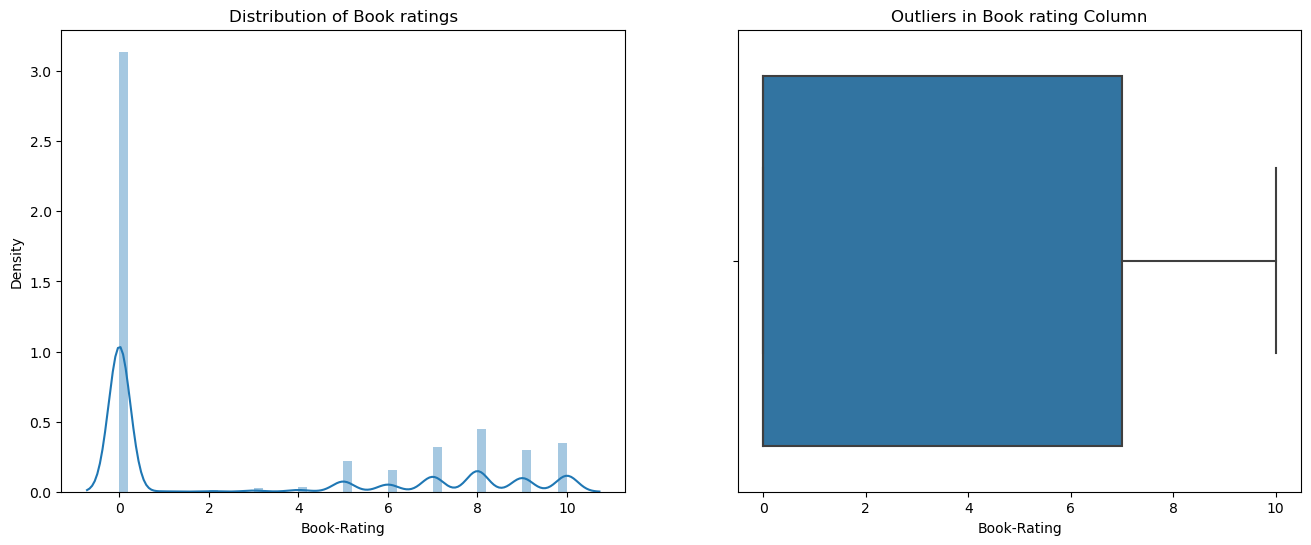

In [28]:
## checking the distribution and outliers in the ratings column

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16,6))  ## distribution plot
sns.distplot(df['Book-Rating'],kde=True, ax=axes[0])
axes[0].set_title("Distribution of Book ratings")

sns.boxplot(x=df['Book-Rating'], ax=axes[1])   ## boxplot
axes[1].set_title("Outliers in Book rating Column")
plt.show()

`Observation`: 
- A sharp peak is observed at 0 rating, indicating that many books have this score or are possibly unrated.There are smaller bars between ratings of 4 to 10, showing fewer books received these scores.
- Boxplot shows that there are no outliers in the rating column

### Distribution and outlier checking for User Age Column

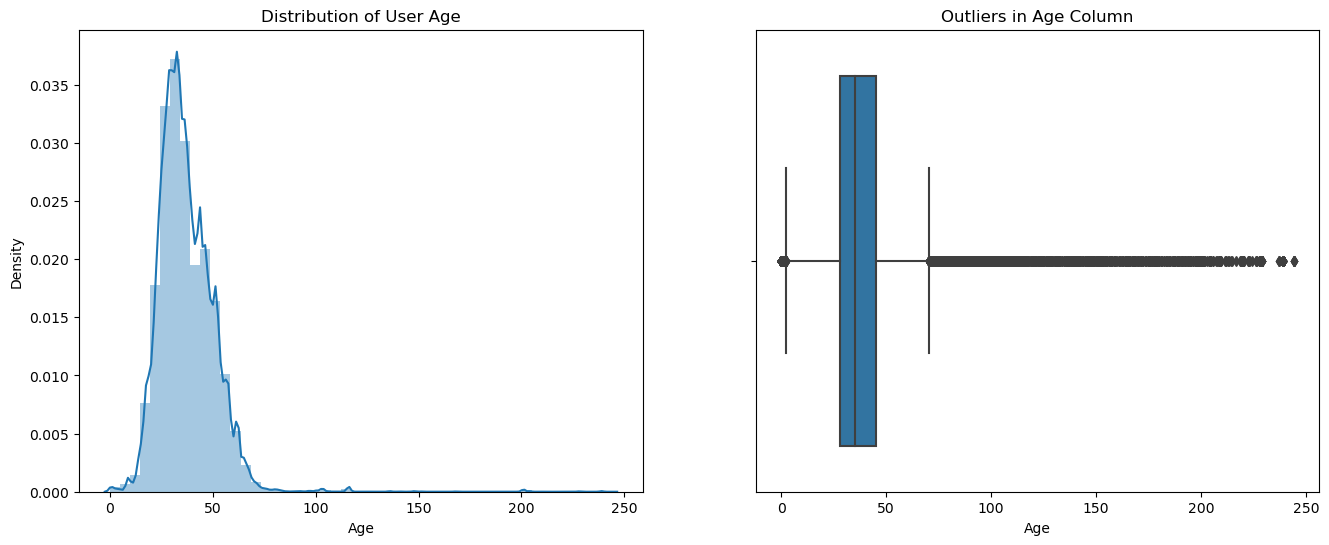

In [29]:
## user age column
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16,6))
sns.distplot(df['Age'],kde=True, ax=axes[0])
axes[0].set_title("Distribution of User Age")

sns.boxplot(x=df['Age'], ax=axes[1])
axes[1].set_title("Outliers in Age Column")
plt.show()

`Observation`: 
- A sharp peak is observed around the age range of approximately 25 to 35, indicating that most users fall within this age group. There is a rapid decline in user density as age increases beyond 35.
- The majority of users are between approximately 20 and 50 years old. There are several outlier data points for users aged above 100, which could potentially be errors or extreme cases.

### Exploring the users 
- There are some users who voted on different books, we are going to visualize the unique users vs mixed users

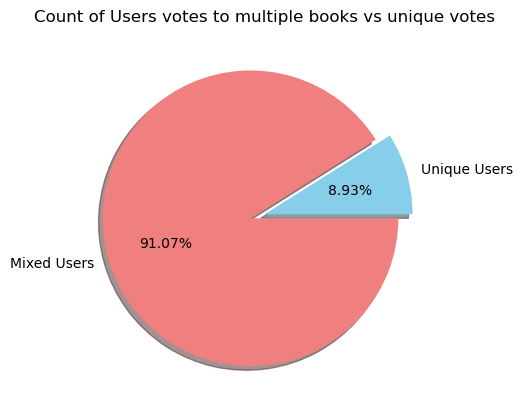

In [30]:
## let's divide unique users using value counts

user = df['User-ID'].value_counts()
unique_user = df['User-ID'].nunique()
normal_user = len(df) - unique_user

## creating a data frame with Unique and Mixed users

user_info = pd.DataFrame({'Category':['Unique Users','Mixed Users'],
                         'Count':[unique_user,normal_user]})

## plotting a pie chart to viusalize the percentage of unique and mixed users
plt.pie(user_info['Count'], labels=user_info['Category'],autopct='%1.2f%%',explode=(0,0.1),colors=['skyblue','lightcoral'],
       shadow=True,)
plt.title('Count of Users votes to multiple books vs unique votes')
plt.show()

`Observation:`
-  Mixed Users: By the above chart, we can say that the red portion of the pie inidcates users, which occupies 91.07% of the chart, represents the “Mixed Users”. These are users who have voted on multiple books.
- Unique Users: The small blue portion of the pie, which takes up 8.93% of the chart, represents the “Unique Users”. These are individuals who have voted uniquely on a single book.

This chart indicates that the majority of votes come from users who vote on multiple books, while a smaller portion of votes come from users who vote uniquely on a single book. This could suggest a high level of engagement among a core group of users.

### Exploring the most liked books 

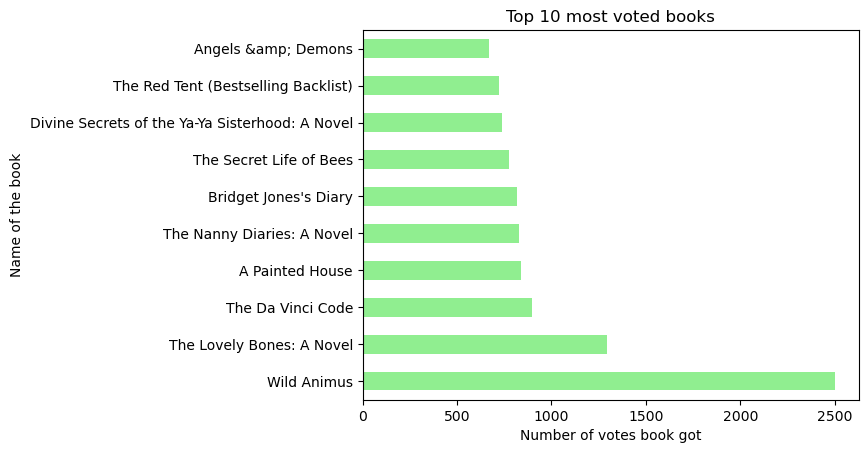

In [31]:
## extracting top ten books using nlargest method
df['Book-Title'].value_counts(
               ).nlargest(10
               ).plot.barh(color='lightgreen') ## plotting the horizontal bar plot 

plt.title("Top 10 most voted books")
plt.xlabel('Number of votes book got')
plt.ylabel('Name of the book')
plt.show()

`Observation`: From the above graph we can conclude that:
1. Wild Animus: This book has received the highest number of votes among the top 10 books. Wild animus is a adventurous fictional book.  Makes sense
2. The Lovely Bones: A Novel: This book has the second highest number of votes. This is also a fictional novel
3. The Da Vinci Code: This is book recieved only a bit higher than other 7 books. This is a Mystery fictional novel.

- Distribution: The distribution of votes among these top 10 books is uneven, with “Wild Animus” receiving significantly more votes than the other books.

This graph provides insights into the popularity of these books among users, as indicated by the number of votes they received. “Wild Animus” appears to be the most popular book in this selection.

*Even though, we dont have the genres of the book, by researching and understanding the user preferenc, we can say that fictional novels are most liked by users.*

### Let's Explore the productivity of the authors

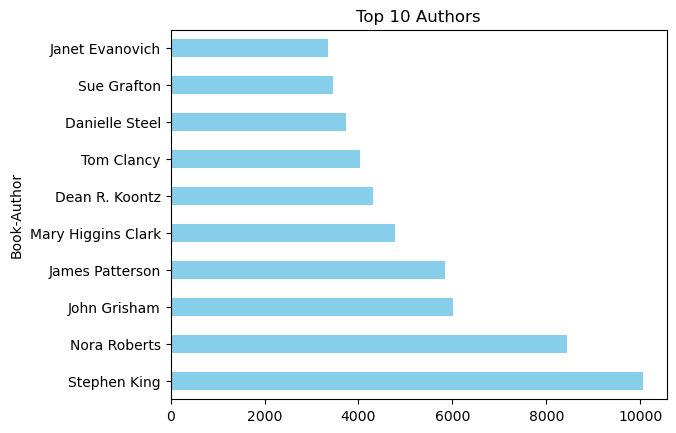

In [32]:
##extracting the top ten authors, whose counts is higher

df['Book-Author'].value_counts().nlargest(10).plot.barh(color='skyblue')
plt.title("Top 10 Authors")
plt.show()

`Observation`: From the above graph we can conclude that
- Stephen King: This author has the highest count of works among the top 10 authors, with over 8000 works.
- Nora Roberts and John Grisham: These authors also have a significant number of works, although less than James Patterson.
- Janet Evanovich: This author has the lowest count among these top ten authors but still has a significant number of works.

This graph provides insights into the productivity of these authors, as indicated by the number of works they have produced.

*Stephen Edwin King is an American author of horror, supernatural fiction, suspense, crime, science-fiction, and fantasy novels. Called the "King of Horror", his books have sold more than 350 million copies as of 2006, and many have been adapted into films, television series, miniseries, and comic books. Top IMDB rated movie "Shawshank redemption" was also written by him.*

### Exploring the most prolific book publisher

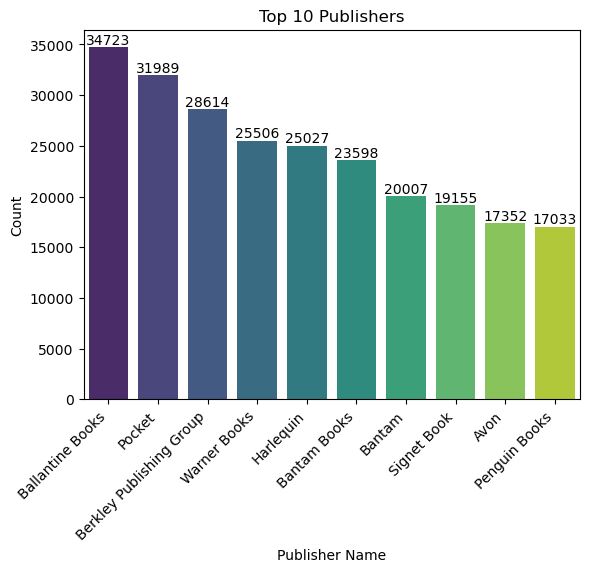

In [33]:
## Publisher value count to publisher variable 
Publisher = df['Publisher'].value_counts().nlargest(10).reset_index()
Publisher.columns = ['Publisher', 'Count']  # Naming the columns appropriately

#plotting a barplot indicating the count of publishers 
ax=sns.barplot(x='Publisher', 
               y='Count', data=Publisher, palette='viridis')

plt.title("Top 10 Publishers")
plt.xlabel("Publisher Name")
plt.ylabel("Count")

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=45, ha='right')
plt.show()

`Observation`: From the above graph we can conlude that:

Ballantine Books has the highest count of books among the top 10 publishers, with a count of 34,723. Pocket has the second highest count of books, with a count of 31,989. Warner Group also has a significant number of books, although less than Ballantine Books and Pocket

- Distribution: The distribution of books among these top 10 publishers is uneven, with Ballantine Books publishing significantly more books than the other publishers.

This graph provides insights into the productivity of these publishers, as indicated by the number of books they have published. Ballantine Books appears to be the most prolific publisher in this selection.

*Ballantine Books is a major American book publisher that is a subsidiary of German media conglomerate Bertelsmann. Ballantine was founded in 1952 by Ian Ballantine with his wife, Betty Ballantine. Famous Lord of the Rings were published by them*

### Exploring the most prolific countries

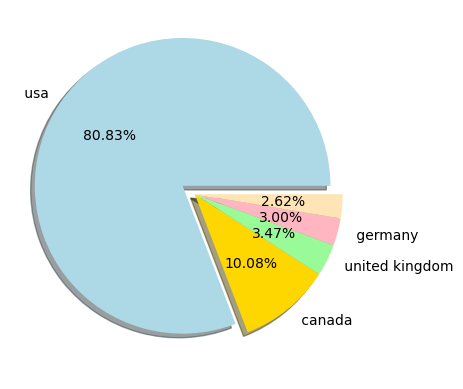

In [34]:
## Extracting the top five book publishing countries 
top_countries = df['Country'].value_counts().nlargest(5).reset_index()
top_countries.columns = ['Country', 'Count'] ## naming the labels properly

colors = ['#ADD8E6', '#FFD700', '#98FB98', '#FFB6C1', '#FFE4B5'] ## choosing the colors for slices

## plotting the pie chart 
plt.pie(top_countries['Count'],labels=top_countries['Country']
        ,autopct='%1.2f%%',explode=(0.1,0,0,0,0),shadow=True,
        colors=colors)

plt.show()

`Observation`: From the above graph we can conclude that America is the most books producing country and least is germany.
- America is dominating the novel producing by 80.83%. But the question is why?
- American literature has a unique perspective on the world, examining themes like the American Dream, coming of age, and freedom and dignity. American fiction also fascinates readers because it depicts the country's vastness, extremes of landscape and temperatures, and gulfs between wealth and poverty.
- Lot of our childhood stories and movies are made in america. [Resources](https://en.wikipedia.org/wiki/American_literature) 

### Uncovering the productive state in the US with most books
- From the above analysis, we all got to know that America has most books published around the world, but lets take this analysis a bit further by exploring which states are productive in Novels

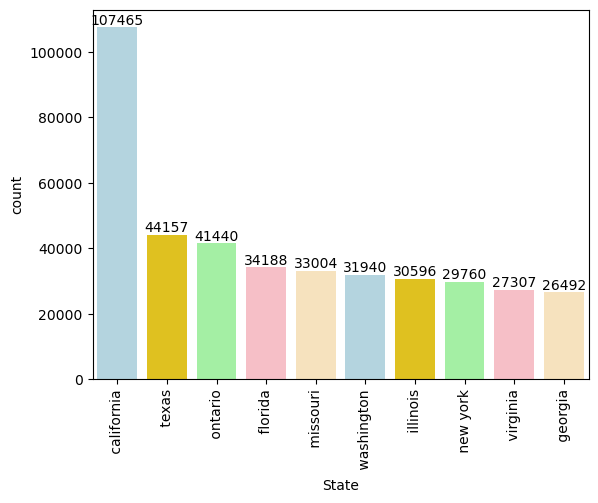

In [35]:
## Extracting top states and choosing the colors
colors = ['#ADD8E6', '#FFD700', '#98FB98', '#FFB6C1', '#FFE4B5']  
top_states = df['State'].value_counts().nlargest(10).reset_index()

## plotting the barplot  
ax = sns.barplot(x='State',y='count',
                 data=top_states, palette=colors)

plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

`Observation`: from the above graph we can conclude that, california has so many books published, california is dominating other states in the US. 

## Bivariate Analysis

- lets explore Average rating by Number of ratings 

In [38]:
## extracting the count of ratings by each book
num_rating_df = df.groupby('Book-Title').count(
                          )['Book-Rating'].reset_index()

##changing the names of the columns as per our convenience
num_rating_df.rename(
                     columns={'Book-Rating':
                              'Num_ratings'},inplace=True)

In [39]:
## grouping the average ratings by book title
avg_rating_df = df.groupby(['Book-Title'])['Book-Rating'].mean().reset_index()

####changing the names of the columns as per our convenience
avg_rating_df.rename(columns={'Book-Rating':'Avg_rating'},inplace=True)

In [40]:
## assigning it to a variable called popular_df
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

### Exploring Average rating of books and Total number of ratings received

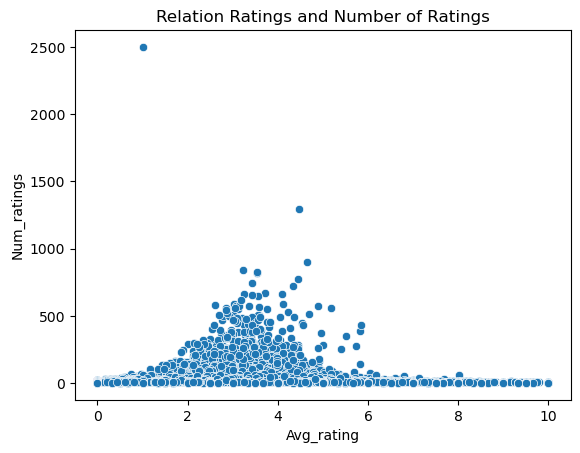

In [41]:
## relation checking by plotting the scatterplot
sns.scatterplot(x='Avg_rating',y='Num_ratings',
                data=popular_df)

plt.title('Relation Ratings and Number of Ratings')
plt.show()

`Observations`: From above graph we can conclude that

- There is a concentration of data points around 0-2 average rating with less than 500 number of ratings. This suggests that many books have low ratings and a small number of ratings.There are two noticeable outliers; one near an average rating of about 1 with over 2000 number of ratings, another near an average rating close to 5 with over 1000 number of ratings. These could represent popular books that have received a large number of ratings.

This graph provides insights into the relationship between the average rating and the number of ratings. It suggests that while many books have low ratings and a small number of ratings, there are a few books that are highly rated and have received a large number of ratings.

## Dealing with the outliers

- We are going to replace the age values as Age cannot be zero and certianly in this type of dataset, min age should be at least over 18
- Although age column is not related for our recommendation system, this is only for pure EDA and understanding readers age

In [42]:
## calculating different percentages for replacing the outlers
perc_5 = df['Age'].quantile(0.05)
perc_25 = df['Age'].quantile(0.25)
perc_75 = df['Age'].quantile(0.75)
perc_85 = df['Age'].quantile(0.85)

# calculating
iqr = perc_75 - perc_25

#upper and lower boundaries 
upper_boundary = perc_75+1.5*iqr
lower_boundary = perc_25-1.5*iqr

print('upper:',upper_boundary, 'lower:',lower_boundary)
print('\n')
print('25% of the age:',perc_25,',', '75% of the age:',perc_75)

upper: 70.5 lower: 2.5


25% of the age: 28.0 , 75% of the age: 45.0


In [43]:
## boolean indexing the outliers with the upper boundary and 5th percentage
df = df[df['Age'] <= upper_boundary]
df = df[df['Age'] >= perc_5]

<Axes: xlabel='Age', ylabel='Density'>

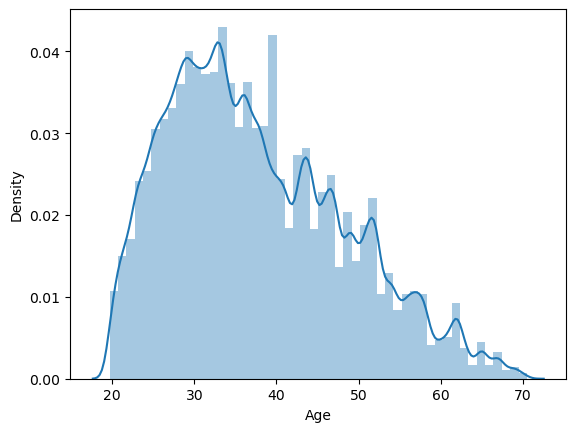

In [44]:
## plotting the age distribution of users 
sns.distplot(df['Age'],kde=True)

In [45]:
## creating a new column named age group which will have a range of ages
Age = []

for i in df['Age']:
    if (i>=20 and i<=30):
        Age.append("20-30")
    elif (i>=30 and i<=40):
        Age.append("30-40")
    elif (i>=40 and i<=50):
        Age.append("40-50")
    elif (i>=50 and i<=50):
        Age.append("50-60")
    else:
        Age.append("60-70")

In [46]:
## creating a new column and cleaning it
df['Age-Group'] = Age
df['Age-Group'].replace(',',' ',inplace=True) ## removing extra commas from the list

# calculating the age users who rated books
age = df.groupby(
                 ['Book-Title','Age-Group'
                 ])['Age'].count().nlargest(10).sort_values(
                 ascending=False)

#creating a dataframe and assigning it to a variable
age_data = pd.DataFrame(age).reset_index()
age_data.rename(columns={'Age':'Count'},inplace=True)

### Exploring the age group of the users who rated the books

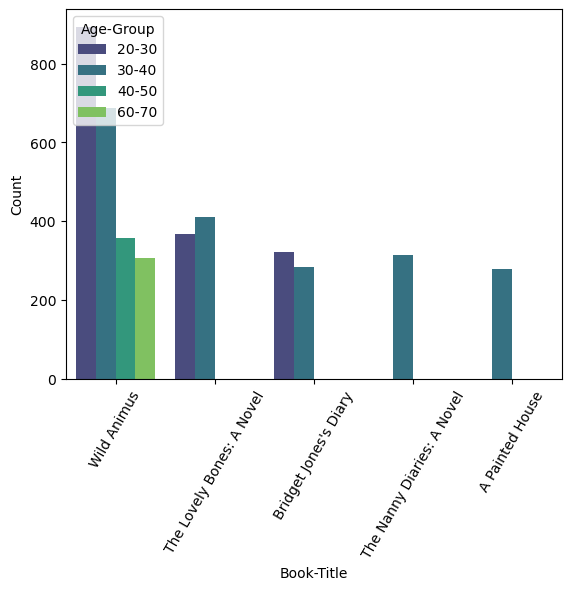

In [47]:
#plottong barplot
sns.barplot(x='Book-Title',y='Count',
            hue='Age-Group',data=age_data,
            palette='viridis')


plt.xticks(rotation=60)
plt.show()

`Observation`: From the above graph we gained a valuable insight
- "Wild Animus" which is a pure fictional book is mostly rated by young adults, as age group ascends the count descends. This show older readers are less preferring fictional books
- by the Book "A Painted House" we can understand that middle aged users rated to humourous novels.

### Most rated author 

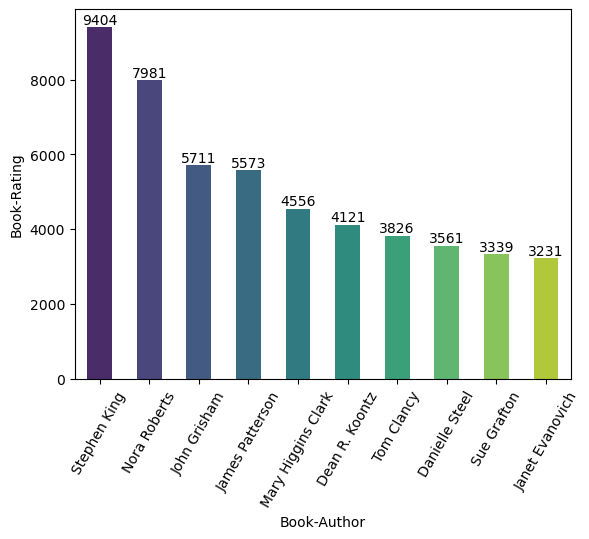

In [48]:
## calculating the top ten most rated author 
author = df.groupby(['Book-Author']).count(
                   )['Book-Rating'].sort_values(
                   ascending=False).nlargest(10).reset_index()
#plotting the barplot
ax = sns.barplot(x='Book-Author',y='Book-Rating',
                data=author,palette='viridis',
                width=0.5)

for i in ax.containers: ## generating bar labels
    ax.bar_label(i)
    
plt.xticks(rotation=60)
plt.show()

`Observation`: As we explored above stephen king is the most rated author by the users followed by Nors Roberts and John Grisham 

### Lets explore the number of books published year-wise

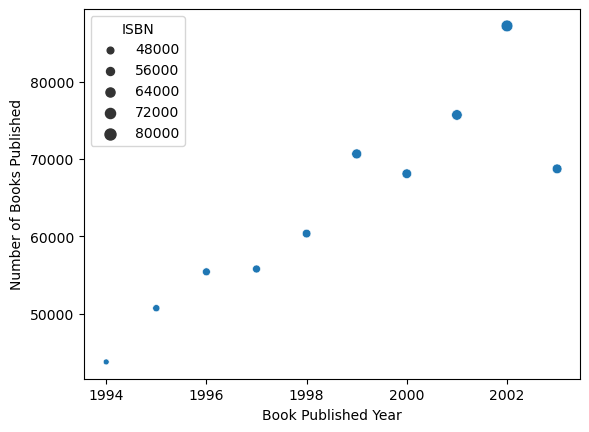

In [49]:
# count of year wise published 
years = df.groupby(['Year-Of-Publication']).count(
                  )['ISBN'].nlargest(10).reset_index()

#scatterplot to visualize
sns.scatterplot(x='Year-Of-Publication',
                y='ISBN',data=years, size='ISBN')

plt.xlabel("Book Published Year")
plt.ylabel("Number of Books Published")
plt.show()

`Observation`: As we can see 1994 is the least productive year. Most productive year is 2002, because of technological advancements made books writing and publishing easier, and books have reached to global audience in the 20th century. 

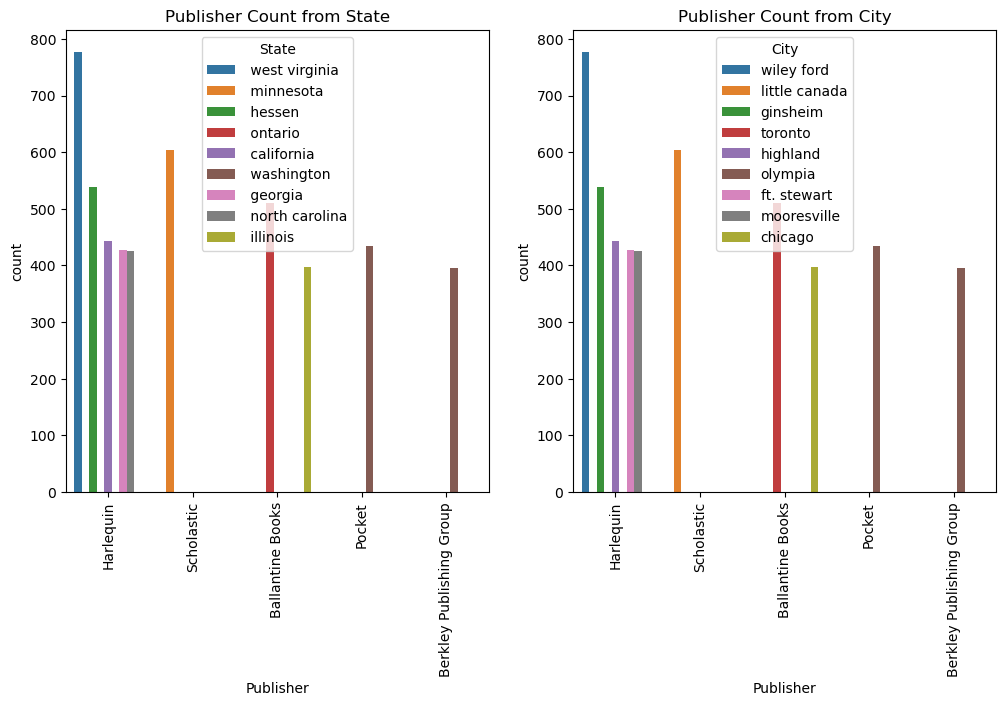

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

## extracting the state wise publications
largest = df[['Publisher', 'Country', 'State', 'City']
            ].value_counts().nlargest(10).reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# barplot 1
sns.barplot(x='Publisher', y='count',
            hue='State', data=largest, ax=axes[0])
axes[0].set_title("Publisher Count from State")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')  

# barplot 2
sns.barplot(x='Publisher', y='count',
            hue='City', data=largest, ax=axes[1])
axes[1].set_title("Publisher Count from City")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')  

plt.show()


`Observation`: 
These are the states and cities in those states where publishers are prolific.

## Popularity Based Recommender System

- we are going to take top 50 books by popularity from users for Popularity based recommender system for our web app Home page

In [51]:
## merging books data on ratings
ratings_with_name = ratings.merge(books,on='ISBN')

## extracting the books title which have sum of ratings
num_rating_df1 = ratings_with_name.groupby(
                                           'Book-Title').count(
                                           )['Book-Rating'].reset_index()

## renaming the columns as per requirements
num_rating_df1.rename(columns={
                               'Book-Rating':'No_of_ratings'}
                               ,inplace=True)

In [52]:
## extracting the calculated average of ratings and assiging it to a variable
avg_ratings = df.groupby(['Book-Title']
                        )['Book-Rating'].mean(
                        ).reset_index()

## renaming the column as per requirements
avg_ratings.rename(columns={'Book-Rating':
                            'avg_rating'},inplace=True)


In [53]:
## merging the sum of ratings on average ratings and assigning to variable
popularity_df = num_rating_df1.merge(
                avg_ratings,on='Book-Title')

popularity_df

,Book-Title,No_of_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,3.000000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
232979,Ã?Â?lpiraten.,2,0.000000
232980,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
232981,Ã?Â?sterlich leben.,1,7.000000
232982,Ã?Â?stlich der Berge.,3,2.666667


In [54]:
## boolean indexing, only the books which have recieved votes greater than 250
popular_df1 = popularity_df[
                popularity_df['No_of_ratings']>=250].sort_values(
                'avg_rating',ascending=False).head(50)

## removing duplicates and merging on Books
top_50 = popular_df1.merge(
                           books,on='Book-Title').drop_duplicates(
                           'Book-Title')[['Book-Title','Book-Author',
                           'Image-URL-M','No_of_ratings','avg_rating']]

In [70]:
## lets check the sample of the data
top_50.sample(5)

,Book-Title,Book-Author,Image-URL-M,No_of_ratings,avg_rating
16,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.965957
147,Left Behind: A Novel of the Earth's Last Days ...,Tim Lahaye,http://images.amazon.com/images/P/0842329129.0...,318,3.970100
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.467480
110,Good in Bed,Jennifer Weiner,http://images.amazon.com/images/P/0743418174.0...,490,4.086316
184,Hard Eight : A Stephanie Plum Novel (A Stephan...,Janet Evanovich,http://images.amazon.com/images/P/0312983867.0...,269,3.788679


## Collaborative Filtering Based

- we are going to build a CF Based R system, which takes input from User and suggests similar according to user taste  

In [56]:
## in this dataset only few users rated 
## we are extracting the Users who actually rated to any book

x = ratings_with_name.groupby('User-ID').count()['Book-Title'] > 200
rated_users = x[x].index

In [57]:
## filtering the unique users
filtered_ratings = ratings_with_name[ratings_with_name['User-ID'].isin(rated_users)]

In [58]:
## again filtering using groupby
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>50
famous_books = y[y].index

In [59]:
## identity check boolean indexing to filter out famous books
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [60]:
## Pivot table
PVT = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
PVT.fillna(0,inplace=True)

In [77]:
PVT.head()

## every book is a vector 
## now you get eucledian distance of every book

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
## importing cosing similarity for distance calculations

from sklearn.metrics.pairwise import cosine_similarity

In [63]:
#to calculate the nearest index
similarity_score = cosine_similarity(PVT)
similarity_score.shape

(679, 679)

In [78]:
## creating a function to recommend the books
def recommend(book_name):
    #fetch index of the book
    index = np.where(PVT.index==book_name)[0][0]  ## finds the index of the book name 
    distances = similarity_score[index] ## can get the eucledian distance of the similar book indexes
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:11]
    
    for i in similar_items:
        print(PVT.index[i[0]]) ## printing the recommendations

In [81]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Witness
The Firm
The Secret Garden


### Modifying the function according to the website requirements
- we are modifying the function in order it to display vectors of our recommendations in the web application

In [119]:
def recommend(book_name):
    #fetch index of the book
    index = np.where(PVT.index==book_name)[0][0] ## finds the index of the book name 
    distances = similarity_score[index] ## can get the eucledian distance of the similar book indexes
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:9] 
     
    ## creating an empty list for adding items into this empty list    
    data = []
    
    ##passing a loop, inside the loop items will be added into empty list called item
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title']==PVT.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        ## adding that item to data
        data.append(item)
    return data

In [120]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg']]

In [108]:
## exporting the file using pickle

#import pickle
#pickle.dump(top_50,open('top_50.pkl','wb'))

In [121]:
#pickle.dump(PVT,open('PVT.pkl','wb'))
#pickle.dump(books,open('books.pkl','wb'))
#pickle.dump(similarity_score,open('simiarity_score.pkl','wb'))

# <font color="Brown"> <center>--- CONCLUSION ---</center> </font>